# <center> MPC Exercise Session </center>

## Introduction

Welcome to the MPC exercise session!! this notebook is going to guide you through concepts about efficient control of thermal systems in buildings. The goal is to achieve energy savings by controlling the heating, ventilation and air conditioning systems in an intelligent manner, taking into account weather forecast and a model of the building. For that we will be using model predictive control (MPC) which is a very handy concept broadly used in industry for optimizing all kind of processes. Anything you learn here you will be able to extrapolate to many other applications. By the end of this tutorial you should: 

1. Be familiar with the basics of MPC and receiding horizon.
2. Understand why predictive controllers like MPC achieve energy savings when compared to traditional reactive controllers.
3. Be able to identify a thermal model of a building by yourself. 
4. Use the identified model to 

Ready? just fasten your seatbelts and enjoy the ride.

The first thing you'd like to do is make a copy of this file and rename it with your own name and surname. For that, at the top-left click "File", and then "Make a copy".

This will redirect you to your new notebook copy. Please rename it keeping the format of the original title, and using your actual name and surname. During the exercise, you will be filling some gaps of the notebook. Please send a copy of your exercise to javier.arroyo@kuleuven.be. To save a local copy, go to "File" -> "Download as" -> "Notebook". It is recommended to save a local copy of the notebook from time to time to don't loose your changes if the internet connection is lost.


## Basic conceps of MPC

https://www.mathworks.com/videos/understanding-model-predictive-control-part-2-what-is-mpc--1528106359076.html 



## Loading the building emulator model

In [15]:
%matplotlib inline

from matplotlib import pyplot as plt
import numpy as np

from testcase import TestCase
import os
os.chdir('BOPTEST/testcase1')
case = TestCase()
case

Inspect the inputs to the emulator model

In [16]:
case.inputs_metadata

{'oveAct_activate': {'Description': 'Activation for Heater thermal power',
  'Maximum': None,
  'Minimum': None,
  'Unit': None},
 'oveAct_u': {'Description': 'Heater thermal power',
  'Maximum': 10000.0,
  'Minimum': -10000.0,
  'Unit': 'W'}}

Inspect outputs of the emulator model

In [17]:
case.outputs_metadata

{'PHea_y': {'Description': 'Heater power',
  'Maximum': None,
  'Minimum': None,
  'Unit': 'W'},
 'TRooAir_y': {'Description': 'Zone air temperature',
  'Maximum': None,
  'Minimum': None,
  'Unit': 'K'}}

## Development of a classical reactive controller

Define first the controller parameters

In [18]:
length = 48*3600
step   = 300

case.set_step(step)

LowerSetp = 273.15+20
UpperSetp = 273.15+23

k_p = 2000

Initialize the inputs for the first time-step

In [19]:
u = {'oveAct_u':0,
     'oveAct_activate': 1}

Go through the main loop for two days of co-simulation

In [20]:
for i in range(int(length/step)):
    # Advance simulation
    y = case.advance(u)
    
    # Compute next control signal
    if y['TRooAir_y']<LowerSetp:
        e = LowerSetp - y['TRooAir_y']
    elif y['TRooAir_y']>UpperSetp:
        e = UpperSetp - y['TRooAir_y']
    else:
        e = 0
        
    value = k_p*e
    u = {'oveAct_u':value,
         'oveAct_activate': 1}

Final Run Statistics: --- 

 Number of steps                                 : 6
 Number of function evaluations                  : 18
 Number of Jacobian evaluations                  : 2
 Number of function eval. due to Jacobian eval.  : 2
 Number of error test failures                   : 1
 Number of nonlinear iterations                  : 10
 Number of nonlinear convergence failures        : 0
 Number of state function evaluations            : 63
 Number of state events                          : 1

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 3e-06
 Tolerances (relative)    : 1e-06

Simulation interval    : 0.0 - 300.0 seconds.
Elapsed simulation time: 0.00341320037842 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 5
 Number of function evaluations                  : 13
 Number 

Final Run Statistics: --- 

 Number of steps                                 : 4
 Number of function evaluations                  : 12
 Number of Jacobian evaluations                  : 1
 Number of function eval. due to Jacobian eval.  : 1
 Number of error test failures                   : 1
 Number of nonlinear iterations                  : 8
 Number of nonlinear convergence failures        : 0
 Number of state function evaluations            : 5

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 3e-06
 Tolerances (relative)    : 1e-06

Simulation interval    : 6300.0 - 6600.0 seconds.
Elapsed simulation time: 0.00377202033997 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 3
 Number of function evaluations                  : 9
 Number of Jacobian evaluations                  : 1
 Number

Final Run Statistics: --- 

 Number of steps                                 : 4
 Number of function evaluations                  : 12
 Number of Jacobian evaluations                  : 1
 Number of function eval. due to Jacobian eval.  : 1
 Number of error test failures                   : 1
 Number of nonlinear iterations                  : 8
 Number of nonlinear convergence failures        : 0
 Number of state function evaluations            : 5

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 3e-06
 Tolerances (relative)    : 1e-06

Simulation interval    : 13500.0 - 13800.0 seconds.
Elapsed simulation time: 0.001296043396 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 4
 Number of function evaluations                  : 12
 Number of Jacobian evaluations                  : 1
 Numbe

Final Run Statistics: --- 

 Number of steps                                 : 3
 Number of function evaluations                  : 8
 Number of Jacobian evaluations                  : 1
 Number of function eval. due to Jacobian eval.  : 1
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 4
 Number of nonlinear convergence failures        : 0
 Number of state function evaluations            : 4

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 3e-06
 Tolerances (relative)    : 1e-06

Simulation interval    : 20100.0 - 20400.0 seconds.
Elapsed simulation time: 0.00109720230103 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 3
 Number of function evaluations                  : 8
 Number of Jacobian evaluations                  : 1
 Numbe

 Tolerances (absolute)    : 3e-06
 Tolerances (relative)    : 1e-06

Simulation interval    : 26100.0 - 26400.0 seconds.
Elapsed simulation time: 0.00107407569885 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 3
 Number of function evaluations                  : 9
 Number of Jacobian evaluations                  : 1
 Number of function eval. due to Jacobian eval.  : 1
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 5
 Number of nonlinear convergence failures        : 0
 Number of state function evaluations            : 4

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 3e-06
 Tolerances (relative)    : 1e-06

Simulation interval    : 26400.0 - 26700.0 seconds.
Elapsed simulation time: 0.00125002861023 seconds.
Final Run Statistics:

 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 3e-06
 Tolerances (relative)    : 1e-06

Simulation interval    : 33900.0 - 34200.0 seconds.
Elapsed simulation time: 0.00115609169006 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 5
 Number of function evaluations                  : 13
 Number of Jacobian evaluations                  : 1
 Number of function eval. due to Jacobian eval.  : 1
 Number of error test failures                   : 1
 Number of nonlinear iterations                  : 9
 Number of nonlinear convergence failures        : 0
 Number of state function evaluations            : 6

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 3e-06
 Tolerances (relative)    : 1e-06

Simulation interval    : 34200.0 - 34500.0 seconds.
Elapsed


Simulation interval    : 39900.0 - 40200.0 seconds.
Elapsed simulation time: 0.000937938690186 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 5
 Number of function evaluations                  : 13
 Number of Jacobian evaluations                  : 1
 Number of function eval. due to Jacobian eval.  : 1
 Number of error test failures                   : 1
 Number of nonlinear iterations                  : 9
 Number of nonlinear convergence failures        : 0
 Number of state function evaluations            : 6

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 3e-06
 Tolerances (relative)    : 1e-06

Simulation interval    : 40200.0 - 40500.0 seconds.
Elapsed simulation time: 0.00211191177368 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 5
 Numbe

Final Run Statistics: --- 

 Number of steps                                 : 3
 Number of function evaluations                  : 9
 Number of Jacobian evaluations                  : 1
 Number of function eval. due to Jacobian eval.  : 1
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 5
 Number of nonlinear convergence failures        : 0
 Number of state function evaluations            : 4

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 3e-06
 Tolerances (relative)    : 1e-06

Simulation interval    : 48900.0 - 49200.0 seconds.
Elapsed simulation time: 0.000734090805054 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 3
 Number of function evaluations                  : 9
 Number of Jacobian evaluations                  : 1
 Numb

 Tolerances (relative)    : 1e-06

Simulation interval    : 57600.0 - 57900.0 seconds.
Elapsed simulation time: 0.00105309486389 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 4
 Number of function evaluations                  : 12
 Number of Jacobian evaluations                  : 1
 Number of function eval. due to Jacobian eval.  : 1
 Number of error test failures                   : 1
 Number of nonlinear iterations                  : 8
 Number of nonlinear convergence failures        : 0
 Number of state function evaluations            : 5

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 3e-06
 Tolerances (relative)    : 1e-06

Simulation interval    : 57900.0 - 58200.0 seconds.
Elapsed simulation time: 0.00107192993164 seconds.
Final Run Statistics: --- 

 Number of steps          

Final Run Statistics: --- 

 Number of steps                                 : 3
 Number of function evaluations                  : 9
 Number of Jacobian evaluations                  : 1
 Number of function eval. due to Jacobian eval.  : 1
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 5
 Number of nonlinear convergence failures        : 0
 Number of state function evaluations            : 4

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 3e-06
 Tolerances (relative)    : 1e-06

Simulation interval    : 68100.0 - 68400.0 seconds.
Elapsed simulation time: 0.00575494766235 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 3
 Number of function evaluations                  : 9
 Number of Jacobian evaluations                  : 1
 Numbe

 Number of nonlinear convergence failures        : 0
 Number of state function evaluations            : 6

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 3e-06
 Tolerances (relative)    : 1e-06

Simulation interval    : 76800.0 - 77100.0 seconds.
Elapsed simulation time: 0.00121688842773 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 5
 Number of function evaluations                  : 13
 Number of Jacobian evaluations                  : 1
 Number of function eval. due to Jacobian eval.  : 1
 Number of error test failures                   : 1
 Number of nonlinear iterations                  : 9
 Number of nonlinear convergence failures        : 0
 Number of state function evaluations            : 6

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 N

 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 3e-06
 Tolerances (relative)    : 1e-06

Simulation interval    : 86700.0 - 87000.0 seconds.
Elapsed simulation time: 0.00115895271301 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 5
 Number of function evaluations                  : 13
 Number of Jacobian evaluations                  : 1
 Number of function eval. due to Jacobian eval.  : 1
 Number of error test failures                   : 1
 Number of nonlinear iterations                  : 9
 Number of nonlinear convergence failures        : 0
 Number of state function evaluations            : 6

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 3e-06
 Tolerances (relative)    : 1e-06

Simulation interval    : 87000.0 - 87300.0 seconds.
Elapsed

Final Run Statistics: --- 

 Number of steps                                 : 4
 Number of function evaluations                  : 12
 Number of Jacobian evaluations                  : 1
 Number of function eval. due to Jacobian eval.  : 1
 Number of error test failures                   : 1
 Number of nonlinear iterations                  : 8
 Number of nonlinear convergence failures        : 0
 Number of state function evaluations            : 5

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 3e-06
 Tolerances (relative)    : 1e-06

Simulation interval    : 97800.0 - 98100.0 seconds.
Elapsed simulation time: 0.00122690200806 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 5
 Number of function evaluations                  : 13
 Number of Jacobian evaluations                  : 1
 Num

 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 3e-06
 Tolerances (relative)    : 1e-06

Simulation interval    : 107100.0 - 107400.0 seconds.
Elapsed simulation time: 0.00129199028015 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 3
 Number of function evaluations                  : 8
 Number of Jacobian evaluations                  : 1
 Number of function eval. due to Jacobian eval.  : 1
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 4
 Number of nonlinear convergence failures        : 0
 Number of state function evaluations            : 4

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 3e-06
 Tolerances (relative)    : 1e-06

Simulation interval    : 107400.0 - 107700.0 seconds.
Elap

Final Run Statistics: --- 

 Number of steps                                 : 3
 Number of function evaluations                  : 9
 Number of Jacobian evaluations                  : 1
 Number of function eval. due to Jacobian eval.  : 1
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 5
 Number of nonlinear convergence failures        : 0
 Number of state function evaluations            : 4

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 3e-06
 Tolerances (relative)    : 1e-06

Simulation interval    : 113100.0 - 113400.0 seconds.
Elapsed simulation time: 0.000990152359009 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 3
 Number of function evaluations                  : 9
 Number of Jacobian evaluations                  : 1
 Nu

Final Run Statistics: --- 

 Number of steps                                 : 5
 Number of function evaluations                  : 13
 Number of Jacobian evaluations                  : 1
 Number of function eval. due to Jacobian eval.  : 1
 Number of error test failures                   : 1
 Number of nonlinear iterations                  : 9
 Number of nonlinear convergence failures        : 0
 Number of state function evaluations            : 6

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 3e-06
 Tolerances (relative)    : 1e-06

Simulation interval    : 118800.0 - 119100.0 seconds.
Elapsed simulation time: 0.00386500358582 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 5
 Number of function evaluations                  : 13
 Number of Jacobian evaluations                  : 1
 N

Final Run Statistics: --- 

 Number of steps                                 : 5
 Number of function evaluations                  : 13
 Number of Jacobian evaluations                  : 1
 Number of function eval. due to Jacobian eval.  : 1
 Number of error test failures                   : 1
 Number of nonlinear iterations                  : 9
 Number of nonlinear convergence failures        : 0
 Number of state function evaluations            : 6

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 3e-06
 Tolerances (relative)    : 1e-06

Simulation interval    : 124800.0 - 125100.0 seconds.
Elapsed simulation time: 0.00359892845154 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 5
 Number of function evaluations                  : 13
 Number of Jacobian evaluations                  : 1
 N

Final Run Statistics: --- 

 Number of steps                                 : 5
 Number of function evaluations                  : 13
 Number of Jacobian evaluations                  : 1
 Number of function eval. due to Jacobian eval.  : 1
 Number of error test failures                   : 1
 Number of nonlinear iterations                  : 9
 Number of nonlinear convergence failures        : 0
 Number of state function evaluations            : 6

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 3e-06
 Tolerances (relative)    : 1e-06

Simulation interval    : 130800.0 - 131100.0 seconds.
Elapsed simulation time: 0.0034339427948 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 6
 Number of function evaluations                  : 20
 Number of Jacobian evaluations                  : 2
 Nu

Final Run Statistics: --- 

 Number of steps                                 : 5
 Number of function evaluations                  : 13
 Number of Jacobian evaluations                  : 1
 Number of function eval. due to Jacobian eval.  : 1
 Number of error test failures                   : 1
 Number of nonlinear iterations                  : 9
 Number of nonlinear convergence failures        : 0
 Number of state function evaluations            : 6

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 3e-06
 Tolerances (relative)    : 1e-06

Simulation interval    : 136800.0 - 137100.0 seconds.
Elapsed simulation time: 0.00115299224854 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 5
 Number of function evaluations                  : 13
 Number of Jacobian evaluations                  : 1
 N

Final Run Statistics: --- 

 Number of steps                                 : 5
 Number of function evaluations                  : 13
 Number of Jacobian evaluations                  : 1
 Number of function eval. due to Jacobian eval.  : 1
 Number of error test failures                   : 1
 Number of nonlinear iterations                  : 9
 Number of nonlinear convergence failures        : 0
 Number of state function evaluations            : 6

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 3e-06
 Tolerances (relative)    : 1e-06

Simulation interval    : 142500.0 - 142800.0 seconds.
Elapsed simulation time: 0.00338387489319 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 4
 Number of function evaluations                  : 12
 Number of Jacobian evaluations                  : 1
 N

Final Run Statistics: --- 

 Number of steps                                 : 3
 Number of function evaluations                  : 9
 Number of Jacobian evaluations                  : 1
 Number of function eval. due to Jacobian eval.  : 1
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 5
 Number of nonlinear convergence failures        : 0
 Number of state function evaluations            : 4

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 3e-06
 Tolerances (relative)    : 1e-06

Simulation interval    : 148800.0 - 149100.0 seconds.
Elapsed simulation time: 0.00156092643738 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 3
 Number of function evaluations                  : 9
 Number of Jacobian evaluations                  : 1
 Num

Final Run Statistics: --- 

 Number of steps                                 : 3
 Number of function evaluations                  : 9
 Number of Jacobian evaluations                  : 1
 Number of function eval. due to Jacobian eval.  : 1
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 5
 Number of nonlinear convergence failures        : 0
 Number of state function evaluations            : 4

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 3e-06
 Tolerances (relative)    : 1e-06

Simulation interval    : 154800.0 - 155100.0 seconds.
Elapsed simulation time: 0.00135087966919 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 3
 Number of function evaluations                  : 9
 Number of Jacobian evaluations                  : 1
 Num

Final Run Statistics: --- 

 Number of steps                                 : 5
 Number of function evaluations                  : 13
 Number of Jacobian evaluations                  : 1
 Number of function eval. due to Jacobian eval.  : 1
 Number of error test failures                   : 1
 Number of nonlinear iterations                  : 9
 Number of nonlinear convergence failures        : 0
 Number of state function evaluations            : 6

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 3e-06
 Tolerances (relative)    : 1e-06

Simulation interval    : 160200.0 - 160500.0 seconds.
Elapsed simulation time: 0.00339698791504 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 5
 Number of function evaluations                  : 13
 Number of Jacobian evaluations                  : 1
 N

Final Run Statistics: --- 

 Number of steps                                 : 5
 Number of function evaluations                  : 13
 Number of Jacobian evaluations                  : 1
 Number of function eval. due to Jacobian eval.  : 1
 Number of error test failures                   : 1
 Number of nonlinear iterations                  : 9
 Number of nonlinear convergence failures        : 0
 Number of state function evaluations            : 6

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 3e-06
 Tolerances (relative)    : 1e-06

Simulation interval    : 165300.0 - 165600.0 seconds.
Elapsed simulation time: 0.00470089912415 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 5
 Number of function evaluations                  : 13
 Number of Jacobian evaluations                  : 1
 N

Final Run Statistics: --- 

 Number of steps                                 : 5
 Number of function evaluations                  : 13
 Number of Jacobian evaluations                  : 1
 Number of function eval. due to Jacobian eval.  : 1
 Number of error test failures                   : 1
 Number of nonlinear iterations                  : 9
 Number of nonlinear convergence failures        : 0
 Number of state function evaluations            : 6

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 3e-06
 Tolerances (relative)    : 1e-06

Simulation interval    : 171300.0 - 171600.0 seconds.
Elapsed simulation time: 0.00107216835022 seconds.
Final Run Statistics: --- 

 Number of steps                                 : 5
 Number of function evaluations                  : 13
 Number of Jacobian evaluations                  : 1
 N

Plot the results of the co-simulation:

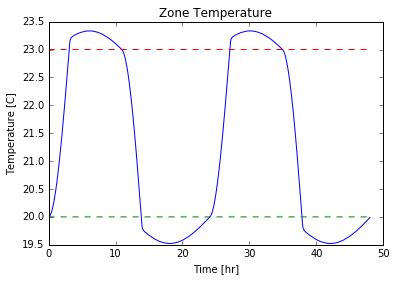

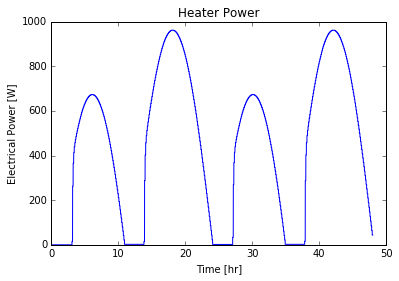

In [21]:
res = case.get_results()
time = [x/3600 for x in res['y']['time']] # convert s --> hr
TZone = [x-273.15 for x in res['y']['TRooAir_y']] # convert K --> C
PHeat = res['y']['PHea_y']
QHeat = res['u']['oveAct_u']

plt.figure(1)
plt.title('Zone Temperature')
plt.plot(time, TZone)
plt.plot(time, 20*np.ones(len(time)), '--')
plt.plot(time, 23*np.ones(len(time)), '--')
plt.ylabel('Temperature [C]')
plt.xlabel('Time [hr]')
plt.figure(2)
plt.title('Heater Power')
plt.plot(time, PHeat)
plt.ylabel('Electrical Power [W]')
plt.xlabel('Time [hr]')
plt.show()

Compute the key performance indicators for the implemented controller

In [22]:
case.get_kpis()

OrderedDict([('tdis_tot', 10.637680517460204),
             ('ener_tot', 21.50097933751196),
             ('cost_tot', 1.5050685536258372),
             ('emis_tot', 4.300195867502393),
             ('time_rat', 3.132115239682405e-07)])

## Development of a controller model

## Development of an MPC

## JModelica test

In [ ]:
# Import and run the CSTR example using CasADi and plot results
from pyjmi.examples import cstr_casadi
cstr_casadi.run_demo()